In [14]:
import math
import numpy as np
import pandas as pd

In [15]:
# Definir se existe 0 em um intervalo
def intervalo_zero(funcao, a, b):
    if funcao(a) * funcao(b) < 0:
        return True
    return False

In [20]:
# Definir o número de casas de precisão pra fazer os cálculos
def bisseccao(funcao, a, b, precisao_c=None, distancia_absoluta=None, distancia_relativa=None):
    # Garantir a < b e a != b
    if a > b:
        [a, b] = [b, a]
    elif a == b:
        return "Interval Error"

    # Inicialização
    it = []

    f_a = funcao(a)
    f_b = funcao(b)
    d_absoluta = abs(a-b)
    if a != 0:
        d_relativa = abs((a-b)/a)
    else:
        d_relativa = None
    
    it.append([a, b, f_a, f_b, d_absoluta, d_relativa])
    
    repeat = False
    if (distancia_absoluta != None and d_absoluta > distancia_absoluta):
        repeat = True
    if (a != 0 and distancia_relativa != None and d_relativa > distancia_relativa):
        repeat = True
    if (precisao_c != None and abs(f_a) > precisao_c and abs(f_b) > precisao_c):
        repeat = True

    # Loop
    while(repeat and a < b):
        # Escolher uma metade
        c = (a+b)/2
        f_c = funcao(c)

        if f_a*f_c < 0:
            b = c
            f_b = funcao(b)
        else:
            a = c
            f_a = funcao(a)
        
        d_absoluta = abs(a-b)
        if a != 0:
            d_relativa = abs((a-b)/a)
        else:
            d_relativa = None

        it.append([a, b, f_a, f_b, d_absoluta, d_relativa])

        repeat = False
        if (distancia_absoluta != None and d_absoluta > distancia_absoluta):
            repeat = True
        if (a != 0 and distancia_relativa != None and d_relativa > distancia_relativa):
            repeat = True
        if (precisao_c != None and abs(f_c) > precisao_c):
            repeat = True
    
    return it


In [21]:
# Definir o número de iterações necessárias
def iteracoes_bisseccao(a, b, distancia_absoluta):
    i = abs(a-b)
    n = (math.log(i)-math.log(distancia_absoluta))/math.log(2)
    return n

In [22]:
def funcao(x):
    # x³ −7x² +14x − 6
    return x**3 - 7*x**2 + 14*x -6

In [25]:
it = bisseccao(funcao, 0, 1, precisao_c=0.01)
df = pd.DataFrame(np.array(it),
                   columns=['a', 'b', 'f(a)', 'f(b)', 'distância absoluta', 'distância relativa'])
df.head()


,a,b,f(a),f(b),distância absoluta,distância relativa
0,0,1,-6,2,1,None
1,0.5000,1,-0.625000,2,0.5000,1.000000
2,0.5000,0.750,-0.625000,0.984375,0.2500,0.500000
3,0.5000,0.625,-0.625000,0.259766,0.1250,0.250000
4,0.5625,0.625,-0.161865,0.259766,0.0625,0.111111


In [29]:
df_a = df[['a', 'f(a)']]
df_b = df[['b', 'f(b)']]

In [28]:
df_a.head()

,a,f(a)
0,0,-6
1,0.5000,-0.625000
2,0.5000,-0.625000
3,0.5000,-0.625000
4,0.5625,-0.161865


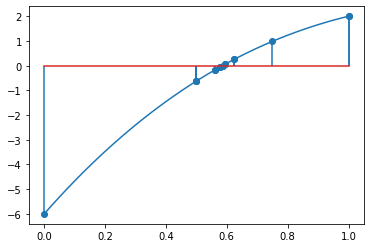

In [48]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Data for plotting
t = np.arange(0, 1, 0.01)
s = funcao(t)

fig, ax = plt.subplots()
line, = ax.plot(t, s)
        
x_a = np.asarray(df_a[['a']])
y_a = np.asarray(df_a[['f(a)']])
x_b = np.asarray(df_b[['b']])
y_b = np.asarray(df_b[['f(b)']])

x = np.concatenate((x_a, x_b), axis=0)
y = np.concatenate((y_a, y_b), axis=0)

plt.stem(x, y)
plt.show()